In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

%matplotlib inline

# AdaBoost
## 9.1 Exponential loss vs misclasification loss
In boosting, we label (for convenience) the classes as $+1$ and $-1$, respectively. We furthermore let our classifier $\widehat{y}(x)$ be on the form $\widehat{y}(x) = \operatorname{sign}\left(c(x)\right)$, i.e., a thresholding at $0$ of some real-valued function $c(x)$. Assume that we have learned some function $\widehat{c}(x)$ from training data such that we can make predictions $\widehat{y}(x) = \operatorname*{sign}\left(\widehat{c}(x)\right)$. Fill in the missing columns in the table below:

| ${\widehat{c}{(x_\star)}}$ | $\widehat{y}_\star$ | Exponential loss <br>$\mathrm{exp}{\left(-y_\star\widehat{c}{(x_\star)}\right)}$ | Misclassification loss<br> $\mathbb{I}\left(y_\star\neq\widehat{y}_\star\right)$ | $y_\star$|
|:---:|:---:|:---:|:---:|:---:|
| 0.3  |  +1  | 1.35 |  1   |  -1  |
|-0.2  |  -1  | 0.82 |  0   |  -1  |
| 1.5  |  +1  | 0.22 |  0   |   1  |
|-4.3  |  -1  | 73.7 |  1   |   1  |

In what sense is the exponential loss more informative than the misclassification loss, and how can that information be used when training a classifier?

In [6]:
import numpy as np
np.exp(-(1) * -4.3)

73.69979369959579

## 9.2 AdaBoost for spam classification
Consider the very same setting data set for the data set `email.csv` as in problem 8.2, but now use AdaBoost instead. AdaBoost is available in `sklearn.ensemble` as the command `AdaBoostClassifier()`. What test error do you achieve?

In [7]:
# url = 'data/email.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/email.csv'
email = pd.read_csv(url)

In [8]:
email.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_soft_brackets,char_freq_hard_brackets,char_freq_exclamation_mark,char_freq_dollarsign,char_freq_numbersign,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,Spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,Spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,Spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,Spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,Spam


In [9]:
email.shape

(4601, 58)

In [10]:
email.keys()

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [16]:
from sklearn.model_selection import train_test_split

label = email["Class"]
features = email.drop(["Class"], axis="columns")
seed = 42

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=seed)

# Fit the model
model = AdaBoostClassifier()
model.fit(x_train, y_train)

# Predict
pred = model.predict(x_test)
error = np.mean(pred != y_test)
print(error)

0.06516072980017376


In [19]:
# Baseline model (predict spam for everything)

y_null = np.array(["Spam"] * pred.shape[0])
error = np.mean(y_null != y_test)
print(error)

0.5873153779322329


## 9.3 Exploring the AdaBoost algorithm
The script below illustrates the AdaBoost algorithm in the same way as was done in lecture 7. Familiarize yourself with the code and compare it to the pseudocode given in the course literature (Chapter 7 in the lecture notes). Explore what happens if you make changes in the input data and the number of trees (stumps), B, used!

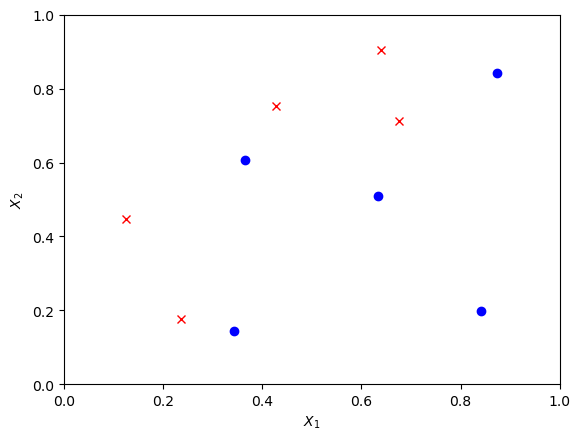

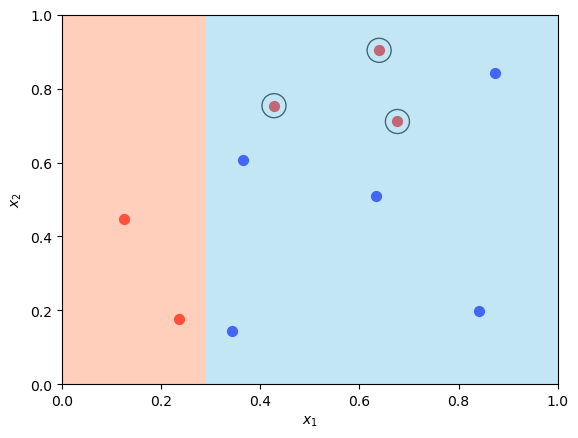

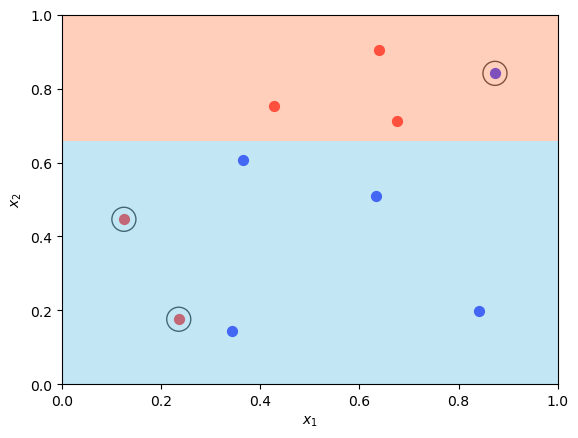

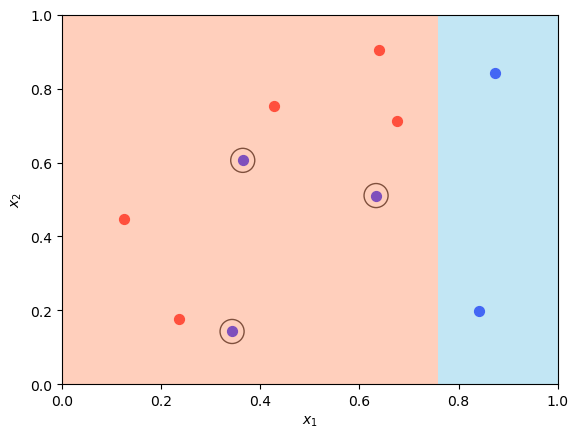

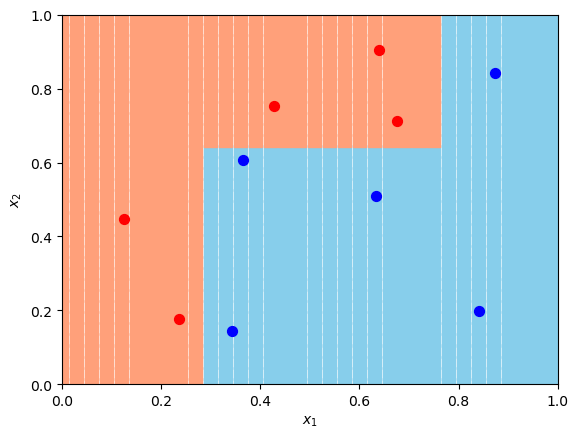

In [20]:
X1 = np.array([0.2358,0.1252,0.4278,0.6398,0.6767,0.8733,0.3648,0.6336,0.3433,0.8410])
X2 = np.array([0.1761,0.4465,0.7539,0.9037,0.7111,0.8414,0.6060,0.5107,0.1430,0.1994])
X = np.column_stack([X1,X2])
y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1])
n = len(y)
# note: the class labels are 1 and -1

fig, ax = plt.subplots()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

# plot the data
ax.plot(X1[y==1], X2[y==1], 'x', color='red')
ax.plot(X1[y==-1], X2[y==-1], 'o', color='blue')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')


# define some variables we will fill out in the loop below
stumps = []
alpha = []
w = np.repeat(1/n, n) # the boosting weights, start with equal weights
B = 3

# learn the boosting classifier
for b in range(B):
    # prepare plots
    fig, ax = plt.subplots()
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 1))
    # use a decision stump (tree with depth 1) as base classifier
    model = tree.DecisionTreeClassifier(max_depth=1)
    model.fit(X, y, sample_weight=w)
    stumps.append(model)                 # Saving the model in each step
    # plot the decision boundary
    split_variable = model.tree_.feature[0]
    split_value = model.tree_.threshold[0]
    if split_variable == 0:
        x1 = [0, split_value, split_value, 0]
        x2 = [0, 0, 1, 1]
        ax.fill(x1, x2, 'lightsalmon', alpha=0.5)
        x1 = [split_value, 1, 1, split_value]
        ax.fill(x1, x2, 'skyblue', alpha=0.5)
    elif split_variable == 1:
        x1 = [0, 1, 1, 0]
        x2 = [split_value, split_value, 1, 1]
        ax.fill(x1, x2, 'lightsalmon', alpha=0.5)
        x2 = [0, 0, split_value, split_value]
        ax.fill(x1, x2, 'skyblue', alpha=0.5)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    # plot the data
    ax.scatter(X1[y==1], X2[y==1], s=50, facecolors='red')
    ax.scatter(X1[y==-1], X2[y==-1], s=50, facecolors='blue')
    
    # compute and plot the boosting weights for the next iteration
    correct = model.predict(X) == y
    ax.scatter(X1[~correct], X2[~correct], s=300, facecolors='none', edgecolors='k')

    W = np.sum(w) 
    We = np.sum(w[~correct])   # Sum of incorrect weights

    em = We/W
    a = 1/2*np.log((1-em)/em)    # compute the alpha weights
    alpha.append(a)

    w[correct] = w[correct] * np.exp(-a)   # Omega weights
    w[~correct] = w[~correct] * np.exp(a)

    
# Using the boosting model to predict test inputs
def boost_predict(X):
    pred = []
    for j in range(len(X)):
        predictions = np.empty(B)
        for i in range(B):
            predictions[i] = stumps[i].predict(X[j,:].reshape(1,-1))
        C = np.sum(np.array(alpha)[predictions==1]) - np.sum(np.array(alpha)[predictions==-1])
        pred.append(np.sign(C))
    return pred


# predict all pixels in the plot, i.e., plot the decision boundary
fig, ax = plt.subplots()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
res = 0.1   # resolution of the squares
xs1 = np.arange(0, 1.02, 0.03)
xs2 = np.arange(0, 1.02, 0.03)
x1, x2 = np.meshgrid(xs1, xs2) 
X_all = np.column_stack([x1.flatten(),x2.flatten()])
prediction = boost_predict(X_all)

colors = np.where(np.array(prediction)==1,'lightsalmon', 'skyblue')
ax.scatter(x1.flatten(), x2.flatten(), s = 90, marker='s', c=colors)
ax.scatter(X1[y==1], X2[y==1], s=50, facecolors='red')
ax.scatter(X1[y==-1], X2[y==-1], s=50, facecolors='blue')

plt.show()

## 9.4 Deriving the AdaBoost weights
The AdaBoost classifier can be written as 
\begin{equation}
    \widehat{y}_{\text{boost}}(\mathbf{x}) = \text{sign}\left( c^{(B)}(\mathbf{x}) \right)
\end{equation}
where the functions $c^{(1)}(\mathbf{x}), \, \dots, c^{(B)}(\mathbf{x})$ are constructed sequentially as
\begin{equation}
    c^{(b)}(\mathbf{x}) = c^{(b-1)}(\mathbf{x}) + \alpha^{(b)} \widehat y^{(b)}(\mathbf{x}),
\end{equation}
initialized with $c^{(0)}(x) \equiv 0$. The $b$th ensemble member $\widehat y^{(b)}(x)$ is found by applying the chosen base classifier to a weighted version of the training data.
Once this has been found, we also need to compute the corresponding
"confidence" coefficient $\alpha^{(b)}$. This is done by minimizing the weighted exponential loss of the training data,
\begin{align}
    \alpha^{(b)} = \arg\min_{\alpha}\left\{\sum_{i=1}^n w_i^{(b)} \exp \left(- \alpha y_i \widehat y^{(b)}(\mathbf{x}_i) \right) \right\}
\end{align}
where $w_i^{(b)} = \exp\left(-y_i c^{(b-1)}(\mathbf{x}_i)\right)$.
		
Show that the optimal solution is given by
\begin{equation}
    \alpha^{(b)} = \frac{1}{2}\ln\left( \frac{1 - E_{\text{train}}^{(b)}}{E_{\text{train}}^{(b)}} \right)
\end{equation}
where 
\begin{equation}
    E_{\text{train}}^{(b)} = \sum_{i=1}^n  \frac{w_i^{(b)}}{\sum_{j=1}^n w_{j}^{(b)}} \mathbb{I}(y_i \neq \widehat{y}^{(b)}(\mathbf{x}_i)).
\end{equation}
		
_Hint 1: We use class labels $-1$ and $1$, i.e. $y_i \in \{-1, 1\}$ and $\widehat{y}^{(b)}(\mathbf{x}_i) \in \{-1, 1\}$. Using this fact, divide the sum in the objective function in the equation for $\alpha^{(b)}$ into one sum ranging over all correctly classified training data points and one sum ranging over all misclassified training data points._
		
_Hint 2: You are allowed to use the fact that the objective function in the equation for $\alpha^{(b)}$ has a single stationary point corresponding to the global minima._

## 9.5  Gradient boosting
Explore gradient boosting by using `GradientBoostingClassifier()` on the spam data set `email.csv`

In [53]:
from sklearn.metrics import accuracy_score

email["Numeric class"] = np.where(email["Class"] == "Spam", 1, 0)
label = email["Numeric class"]
features = email.drop(["Class", "Numeric class"], axis="columns")

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20)

# Fit the model
gradient_boost = GradientBoostingClassifier(n_estimators=100, max_depth=10, min_samples_leaf=10)
gradient_boost.fit(x_train, y_train)

# Predict
pred = gradient_boost.predict(x_test)
error = np.sum(pred != y_test) / pred.shape[0]
print(error)
acc = accuracy_score(y_test, pred)
print(acc)

0.048859934853420196
0.9511400651465798


In [40]:
from sklearn.model_selection import cross_validate

def cross_val(estimator):
    
    cv = cross_validate(
        estimator, 
        features, 
        label, 
        cv=5, 
        scoring=["accuracy", "precision", "recall", "f1"],
    )
    
    return cv

In [50]:
cv = cross_val(gradient_boost)

In [55]:
np.mean(cv["test_accuracy"])

0.926315677666053